# Import Libraries

In [397]:
import zipfile

In [398]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt

In [399]:
with zipfile.ZipFile("/content/TASK_2.zip","r") as zip_ref:
  zip_ref.extractall("/content/datasets")

# Data Load

In [400]:
blinded_test_dataset = pd.read_csv("/content/datasets/TASK_2/blinded_test_set.csv")
test_dataset = pd.read_csv("/content/datasets/TASK_2/test_set.csv")
train_dataset = pd.read_csv("/content/datasets/TASK_2/train_set.csv")

In [401]:
y_test = test_dataset["CLASS"]
y_train = train_dataset["CLASS"]

# Data Exploration

In [402]:
train_dataset.head()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_3230,Feature_3231,Feature_3232,Feature_3233,Feature_3234,Feature_3235,Feature_3236,Feature_3237,Feature_3238,CLASS
0,ID_1,18281.541667,18432.0,9409.650391,0.514708,0.011300,0.045369,2.803803,0.356658,1.803803,...,382.968383,2214.0,1.0,136.625113,0.061710,0.0,28.154838,4.174959,0.061710,0
1,ID_2,20010.083333,20100.0,8303.049072,0.417707,0.014959,0.080294,2.338398,0.429532,1.338398,...,452.986164,2548.5,1.0,232.564022,0.090548,0.0,27.934229,3.931950,0.090548,1
2,ID_3,27260.125000,27437.0,12189.649414,0.447160,0.011428,0.046402,2.782842,0.359345,1.782842,...,419.781765,3400.0,1.0,233.593529,0.068704,0.0,27.904807,4.085035,0.068704,1
3,ID_4,41938.125000,42138.0,17866.433594,0.426019,0.009908,0.034878,3.060655,0.326727,2.060655,...,439.023968,5424.0,1.0,427.429572,0.078803,0.0,27.870588,4.011726,0.078803,0
4,ID_5,41274.125000,41439.0,14315.041992,0.346828,0.013596,0.065680,2.478506,0.403469,1.478506,...,485.209184,5096.0,1.0,726.731554,0.142608,0.0,28.846909,3.571352,0.142608,0


In [403]:
len(train_dataset)

315

In [404]:
set(train_dataset["CLASS"])

{0, 1}

Below it is observed most of features have zero variance

In [405]:
train_dataset.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_3230,Feature_3231,Feature_3232,Feature_3233,Feature_3234,Feature_3235,Feature_3236,Feature_3237,Feature_3238,CLASS
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,...,315.000000,315.000000,315.0,315.000000,315.000000,315.0,315.000000,315.000000,315.000000,315.000000
mean,36401.611839,36558.978836,13421.797935,0.399783,0.013326,0.066770,2.572654,0.395949,1.572654,355.140036,...,458.273347,4580.805291,1.0,620.374167,0.112015,0.0,28.510670,3.792381,0.112015,0.393651
std,23979.228698,24006.711019,5229.346354,0.064272,0.002885,0.034442,0.305500,0.054492,0.305500,5460.014132,...,39.628050,2980.121623,0.0,1254.417871,0.043563,0.0,1.711272,0.257607,0.043563,0.489336
min,4601.166667,4646.000000,2420.351481,0.137726,0.008904,0.028169,1.684709,0.304269,0.684709,1.262551,...,309.374029,591.333333,1.0,45.791124,0.058477,0.0,16.430985,1.995746,0.058477,0.000000
25%,23287.562500,23443.500000,10245.704590,0.357646,0.011459,0.046652,2.403035,0.359990,1.403035,14.214779,...,432.298489,2881.000000,1.0,245.299821,0.083622,0.0,27.691774,3.655440,0.083622,0.000000
50%,34818.166667,35028.000000,13894.792969,0.394076,0.012477,0.055314,2.624547,0.381018,1.624547,24.110200,...,460.598280,4377.000000,1.0,424.561776,0.103960,0.0,28.424340,3.815115,0.103960,0.000000
75%,45575.708333,45750.000000,16633.839844,0.434799,0.014242,0.072065,2.777867,0.416141,1.777867,43.724701,...,484.566083,5769.000000,1.0,702.791528,0.131579,0.0,29.450389,3.963320,0.131579,1.000000
max,332120.750000,332379.000000,45741.601562,0.643473,0.025418,0.266032,3.286567,0.603905,2.286567,96940.788837,...,636.069588,40797.000000,1.0,20921.640194,0.512823,0.0,35.149153,4.271132,0.512823,1.000000


## Class balance test

In [406]:
train_dataset['CLASS'].value_counts()

,count
CLASS,
0,191
1,124


### Zero Variance Features

In [407]:
set(train_dataset["Feature_3232"])

{1.0}

In [408]:
set(train_dataset["Feature_3235"])

{0.0}

Extract  and Remove Zereo Variance Features

In [409]:
columns = train_dataset.columns
redundant_columns = []
for col in columns:
  if len(set(train_dataset[col])) == 1:
    redundant_columns.append(col)

Get ID for later use

In [410]:
y_blinded_ID = blinded_test_dataset["ID"]

In [411]:
blinded_test_dataset.drop(redundant_columns,axis=1,inplace=True)
blinded_test_dataset.drop("ID",axis=1,inplace=True)

In [412]:
redundant_columns.append("ID")
redundant_columns.append("CLASS")
features = train_dataset.drop(redundant_columns,axis=1)
test_dataset = test_dataset.drop(redundant_columns,axis=1)

# Null Values Columns

In [413]:
cols_with_nan = features.columns[features.isnull().any()]

In [414]:
for col in cols_with_nan:
  total_nan_rows = features[col].isnull().sum()
  print(f"{col} has {(total_nan_rows/features.shape[0])*100}% null values")

Feature_1712 has 36.82539682539683% null values
Feature_1713 has 36.82539682539683% null values
Feature_1714 has 36.82539682539683% null values
Feature_1715 has 36.82539682539683% null values
Feature_1716 has 36.82539682539683% null values
Feature_1717 has 36.82539682539683% null values
Feature_1718 has 36.82539682539683% null values
Feature_1719 has 36.82539682539683% null values
Feature_1720 has 36.82539682539683% null values
Feature_1721 has 36.82539682539683% null values
Feature_1722 has 36.82539682539683% null values
Feature_1723 has 36.82539682539683% null values
Feature_1724 has 36.82539682539683% null values
Feature_1725 has 36.82539682539683% null values
Feature_1726 has 36.82539682539683% null values
Feature_1727 has 36.82539682539683% null values
Feature_1728 has 36.82539682539683% null values
Feature_1729 has 36.82539682539683% null values
Feature_1730 has 36.82539682539683% null values
Feature_1731 has 36.82539682539683% null values
Feature_1732 has 36.82539682539683% null

Since 36% of records are empty those columns are removed

In [415]:
features= features.drop(cols_with_nan,axis=1)
test_dataset = test_dataset.drop(cols_with_nan,axis=1)
blinded_test_dataset = blinded_test_dataset.drop(cols_with_nan,axis=1)

# Infinity Value Columns

In [416]:
cols_with_nan = features.columns[np.isinf(features).any()]
print(cols_with_nan)

Index(['Feature_72', 'Feature_90'], dtype='object')


In [417]:
# len(features[features['Feature_72'] == np.inf])

In [418]:
features['Feature_72'].replace([np.inf, -np.inf], np.nan, inplace=True)
features['Feature_72'].fillna(features['Feature_72'].median(), inplace=True)
features['Feature_90'].replace([np.inf, -np.inf], np.nan, inplace=True)
features['Feature_90'].fillna(features['Feature_90'].median(), inplace=True)

<ipython-input-418-3bfe119617e7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features['Feature_72'].replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-418-3bfe119617e7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

## Correlation

Remove features with more than 0.95 correlataion

In [419]:
correlation_matrix = features.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]

In [420]:
features = features.drop(to_drop, axis=1)
test_dataset = test_dataset.drop(to_drop, axis=1)
blinded_test_dataset.drop(to_drop, axis=1, inplace=True)

Threhold variance on 0.01

In [421]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)  # you can tune this
features_var = selector.fit_transform(features)
selected_columns = features.columns[selector.get_support()]



In [422]:
cleaned_features = features[selected_columns]

# Mutual Information calculation

In [423]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(cleaned_features, train_dataset["CLASS"])
mi_series = pd.Series(mi, index=cleaned_features.columns)


Remove features that are independent from target

In [424]:
greater_mi = mi_series[mi_series > 0].index
len(greater_mi)


256

In [425]:
X_selected = cleaned_features[greater_mi]

In [426]:
X_train = X_selected
X_test = test_dataset[X_selected.columns]
X_blind_test = blinded_test_dataset[X_selected.columns]

# MODEL TRAIN

In [427]:


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_blinded_scaled = scaler.transform(X_blind_test)


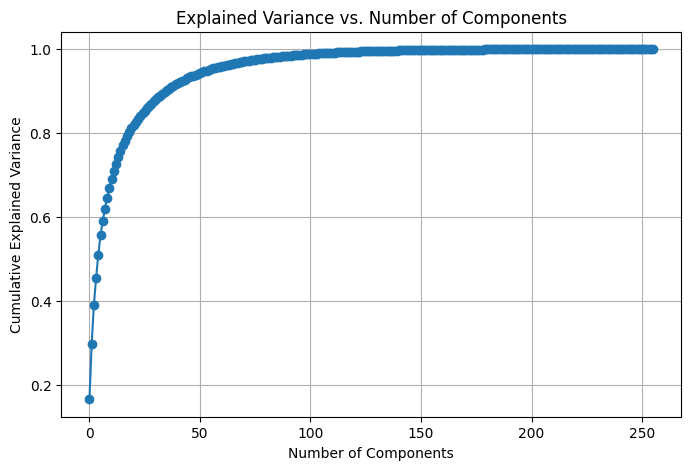

In [428]:

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Plot the cumulative explained variance to decide on the number of components
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


In [429]:
# Apply PCA with the component number 50 as it explains more than 95% variance
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_blinded_pca = pca.transform(X_blinded_scaled)


In [430]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

In [431]:
param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs']},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

In [432]:
best_models = {}
for model_name in models:
    grid_search = GridSearchCV(models[model_name], param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_pca, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best {model_name}: {grid_search.best_params_}")

Best Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best SVM: {'C': 1, 'kernel': 'rbf'}


In [433]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]

    accuracy = accuracy_score(y, y_pred)
    auroc = roc_auc_score(y, y_proba)
    sensitivity = recall_score(y, y_pred)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    specificity = tn / (tn + fp)
    f1 = f1_score(y, y_pred)

    return {
        'Accuracy': accuracy,
        'AUROC': auroc,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'F1-score': f1
    }

# Evaluate models on the test set
metrics = {}
for model_name, model in best_models.items():
    metrics[model_name] = evaluate_model(model, X_test_pca, y_test)

metrics_df = pd.DataFrame(metrics).T
print(metrics_df)


                     Accuracy     AUROC  Sensitivity  Specificity  F1-score
Logistic Regression      0.65  0.680213     0.333333     0.879310  0.444444
Random Forest            0.57  0.618021     0.190476     0.844828  0.271186
SVM                      0.62  0.676519     0.214286     0.913793  0.321429


In [434]:
probabilities = []

# Iterate over each model
for model_name, model in best_models.items():
    # Get class probabilities for each sample
    probas = model.predict_proba(X_blinded_pca)
    # Convert to DataFrame and add model name as a prefix to column names
    probas_df = pd.DataFrame(probas, columns=[f'{model_name}_Class_{i}' for i in range(probas.shape[1])])

    probabilities.append(probas_df)


probabilities_df = pd.concat(probabilities, axis=1)
probabilities_df['id'] = y_blinded_ID.values


In [435]:
probabilities_df.to_csv('blinded_test_class_probabilities_with_id.csv', index=False)